## Text Data Mining


Mostly adapted from: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import arff
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm

from sklearn import tree, linear_model, metrics, dummy, naive_bayes, neighbors

from IPython.display import Image
import pydotplus

import nltk
import gensim
import wordcloud

import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim

In [2]:
sns.set_context("paper")
sns.set_style("ticks")

def get_confusion_matrix(clf, X, y, verbose=True, classes=None):
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y_true=y, y_pred=y_pred)
    clf_report = metrics.classification_report(y, y_pred)
    if classes is None:
        classes = clf.classes_
    df_cm = pd.DataFrame(cm, columns=classes, index=classes)
    if verbose:
        print clf_report
        print df_cm
    return clf_report, df_cm

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [6]:
len(twenty_train.data), len(twenty_test.data)

(2257, 1502)

In [11]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [13]:
print(twenty_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [18]:
"\n".join(twenty_train.data[0].splitlines()[6:-5])

u'Does anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.'

In [20]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [21]:
twenty_train.target[0]

1

In [22]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [23]:
classification_categories = ["soc.religion.christian", "sci.med"]

In [24]:
classes = np.array(twenty_train.target_names)

In [25]:
classes

array(['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], 
      dtype='|S22')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

## Show how to get help on functions

In [27]:
CountVectorizer?

In [28]:
count_vec = CountVectorizer(stop_words="english", token_pattern="[a-z]+")

In [29]:
X_train_counts = count_vec.fit_transform(twenty_train.data)
X_test_counts = count_vec.transform(twenty_test.data)

In [30]:
print "X_train_counts.shape =", X_train_counts.shape
print "X_test_counts.shape =", X_test_counts.shape

X_train_counts.shape = (2257, 30877)
X_test_counts.shape = (1502, 30877)


In [31]:
count_vec.vocabulary_.items()[:10]

[(u'raining', 22239),
 (u'uhura', 28449),
 (u'schlegel', 24205),
 (u'hordes', 12488),
 (u'moskowitz', 17773),
 (u'foul', 10438),
 (u'tilton', 27646),
 (u'compatable', 5071),
 (u'circuitry', 4515),
 (u'pantheistic', 19750)]

In [32]:
count_vec.get_feature_names()[100:110]

[u'absent',
 u'absitinence',
 u'absol',
 u'absolute',
 u'absolutely',
 u'absolutes',
 u'absolutism',
 u'absolutist',
 u'absolve',
 u'absorb']

In [33]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train_counts, twenty_train.target)
report, df_cm = get_confusion_matrix(clf, X_train_counts, twenty_train.target, classes=twenty_train.target_names)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       0.99      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      0.99      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     479              0        0   
comp.graphics                     0            584        0   
sci.med                           0              2      592   
soc.religion.christian            0              3        0   

                        soc.religion.christian  
alt.atheism                                  1  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     596  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,479,0,0,1
comp.graphics,0,584,0,0
sci.med,0,2,592,0
soc.religion.christian,0,3,0,596


In [34]:
report, df_cm = get_confusion_matrix(clf, X_test_counts, twenty_test.target, classes=twenty_train.target_names)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       319
          1       0.95      0.97      0.96       389
          2       0.96      0.93      0.94       396
          3       0.94      0.96      0.95       398

avg / total       0.94      0.94      0.94      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     289              4        6   
comp.graphics                     6            376        6   
sci.med                          12             12      369   
soc.religion.christian            5              4        5   

                        soc.religion.christian  
alt.atheism                                 20  
comp.graphics                                1  
sci.med                                      3  
soc.religion.christian                     384  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,289,4,6,20
comp.graphics,6,376,6,1
sci.med,12,12,369,3
soc.religion.christian,5,4,5,384


## Using pipelines

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
clf = Pipeline([
        ("vect", CountVectorizer(stop_words="english", token_pattern="[a-z]+")),
        ("nb_clf", naive_bayes.MultinomialNB())
    ])

In [37]:
X = twenty_train.data
y = twenty_train.target
classes = twenty_train.target_names
clf.fit(X, y)
report, df_cm = get_confusion_matrix(clf, X, y, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       0.99      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      0.99      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     479              0        0   
comp.graphics                     0            584        0   
sci.med                           0              2      592   
soc.religion.christian            0              3        0   

                        soc.religion.christian  
alt.atheism                                  1  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     596  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,479,0,0,1
comp.graphics,0,584,0,0
sci.med,0,2,592,0
soc.religion.christian,0,3,0,596


In [38]:
clf.classes_

array([0, 1, 2, 3])

In [39]:
clf.predict(twenty_test.data[:10])

array([2, 2, 2, 0, 3, 0, 1, 3, 2, 2])

In [40]:
report, df_cm = get_confusion_matrix(clf, twenty_test.data, twenty_test.target, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       319
          1       0.95      0.97      0.96       389
          2       0.96      0.93      0.94       396
          3       0.94      0.96      0.95       398

avg / total       0.94      0.94      0.94      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     289              4        6   
comp.graphics                     6            376        6   
sci.med                          12             12      369   
soc.religion.christian            5              4        5   

                        soc.religion.christian  
alt.atheism                                 20  
comp.graphics                                1  
sci.med                                      3  
soc.religion.christian                     384  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,289,4,6,20
comp.graphics,6,376,6,1
sci.med,12,12,369,3
soc.religion.christian,5,4,5,384


## Using logistic regression

In [41]:
clf = Pipeline([
        ("vect", CountVectorizer(stop_words="english", token_pattern="[a-z]+")),
        ("nb_clf", linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs"))
    ])

In [42]:
X = twenty_train.data
y = twenty_train.target
classes = twenty_train.target_names
clf.fit(X, y)
report, df_cm = get_confusion_matrix(clf, X, y, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       1.00      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      1.00      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     480              0        0   
comp.graphics                     0            584        0   
sci.med                           0              0      594   
soc.religion.christian            0              0        0   

                        soc.religion.christian  
alt.atheism                                  0  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     599  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,480,0,0,0
comp.graphics,0,584,0,0
sci.med,0,0,594,0
soc.religion.christian,0,0,0,599


In [43]:
report, df_cm = get_confusion_matrix(clf, twenty_test.data, twenty_test.target, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.79      0.86       319
          1       0.88      0.95      0.91       389
          2       0.93      0.86      0.90       396
          3       0.87      0.97      0.92       398

avg / total       0.90      0.90      0.90      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     253             12       12   
comp.graphics                     3            368       13   
sci.med                          11             33      342   
soc.religion.christian            5              6        1   

                        soc.religion.christian  
alt.atheism                                 42  
comp.graphics                                5  
sci.med                                     10  
soc.religion.christian                     386  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,253,12,12,42
comp.graphics,3,368,13,5
sci.med,11,33,342,10
soc.religion.christian,5,6,1,386


## Text exploration

## Word clouds

In [44]:
text = " ".join(twenty_train.data)

In [45]:
wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)

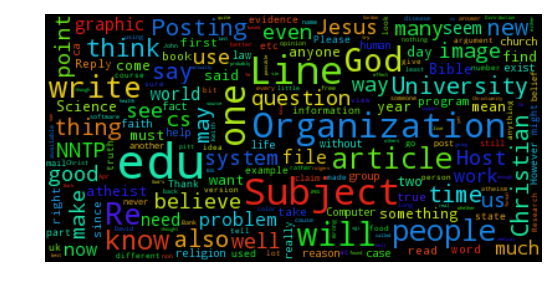

In [46]:
plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [47]:
def get_words_of_class(data, labels, c=0, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    labels = np.array(labels)
    idx = np.where(labels==c)[0]
    text = " ".join(data[i] for i in idx)
    wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
    ax.imshow(wc)
    ax.axis("off")
    return ax

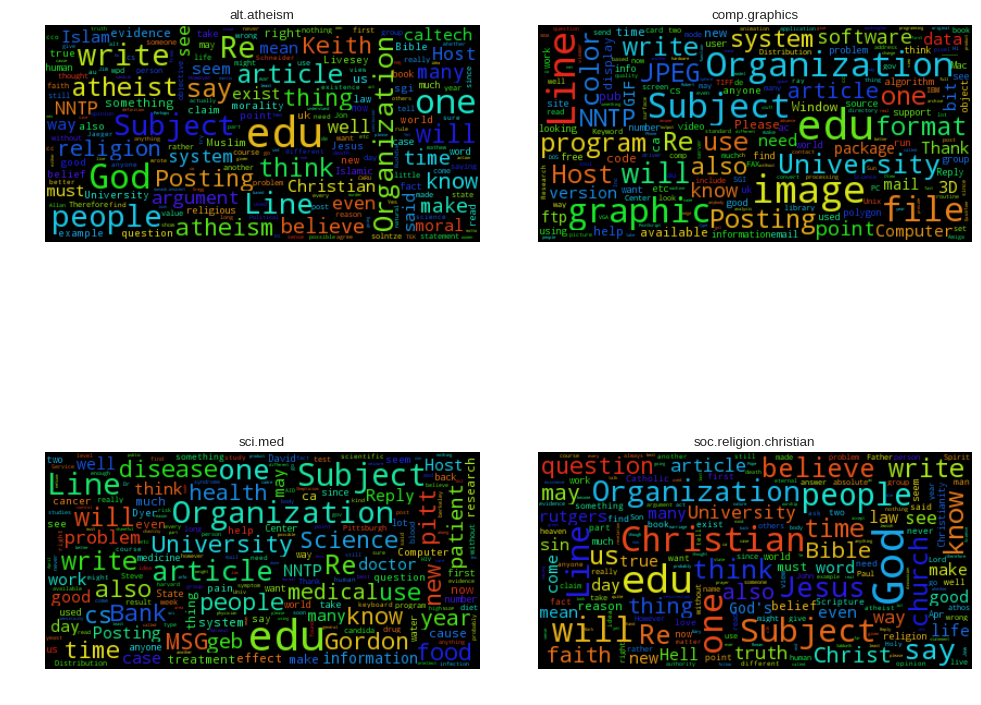

In [48]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
labels = twenty_train.target
data = twenty_train.data
classes = twenty_train.target_names
for i, axi in enumerate(ax):
    get_words_of_class(data, labels, c=i, ax=axi)
    axi.set_title(classes[i])
fig.tight_layout()
    

## Topic Modelling

In [49]:
from nltk.corpus import movie_reviews

In [50]:
movie_reviews.categories()

[u'neg', u'pos']

In [51]:
movie_reviews.words()

[u'plot', u':', u'two', u'teen', u'couples', u'go', ...]

In [52]:
sents = movie_reviews.sents()

In [53]:
len(sents)

71532

In [55]:
sents[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [57]:
movie_reviews.categories()[0]

u'neg'

In [58]:
for i, s in enumerate(sents[:10]):
    print "S[%s]:\t%s" % (i, " ".join(s))

S[0]:	plot : two teen couples go to a church party , drink and then drive .
S[1]:	they get into an accident .
S[2]:	one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
S[3]:	what ' s the deal ?
S[4]:	watch the movie and " sorta " find out .
S[5]:	.
S[6]:	.
S[7]:	critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .
S[8]:	which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly .
S[9]:	they seem to have taken this pretty neat concept , but executed it terribly .


In [61]:
bigrams = gensim.models.Phrases(sents[:1000])

In [62]:
bigrams.vocab.items()[0:10]

[('unimaginative', 2),
 ('and_most', 1),
 ('"_shrewd', 1),
 ('automobile_if', 1),
 ('i_haven', 2),
 ('yellow', 2),
 ('disturbed_parental', 1),
 ('too_ditzy', 1),
 ('hanging', 2),
 ('be_one', 1)]

In [63]:
sorted(bigrams.vocab.iteritems(), key=lambda x: x[1], reverse=True)[:10]

[(',', 1018),
 ('the', 1006),
 ('.', 886),
 ('a', 516),
 ("'", 510),
 ('and', 455),
 ('of', 443),
 ('to', 428),
 ('"', 326),
 ('s', 315)]

In [64]:
word_frequencies = map(lambda x: x[1], bigrams.vocab.iteritems())

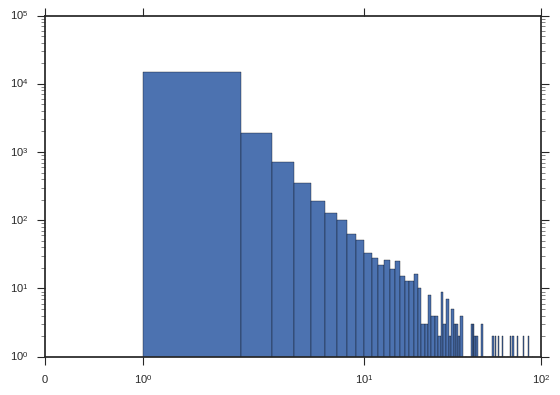

In [65]:
plt.hist(word_frequencies, bins=range(0,100), log=True)
plt.xscale("symlog")

In [66]:
sorted(filter(lambda x: isinstance(x[0], str) and "_" in x[0], 
        bigrams.vocab.iteritems()), key=lambda x: x[1], reverse=True)[:30]

[("'_s", 314),
 (',_and', 108),
 ("'_t", 106),
 ("it_'", 77),
 ('in_the', 76),
 ('of_the', 73),
 (',_but', 69),
 (',_the', 58),
 ('the_film', 53),
 (')_,', 46),
 (',_"', 43),
 ('the_movie', 41),
 ('to_be', 37),
 (')_.', 34),
 (',_it', 32),
 ('to_the', 31),
 ('on_the', 31),
 ('from_the', 30),
 ('is_a', 29),
 ('and_the', 28),
 ('in_a', 28),
 ('with_the', 27),
 ('._"', 27),
 ("he_'", 26),
 ('with_a', 25),
 ('as_a', 25),
 (',_a', 24),
 ('for_the', 24),
 ('of_a', 23),
 ('this_film', 23)]

In [68]:
corpus = bigrams[sents[:1000]]
id2word = gensim.corpora.Dictionary(corpus)

In [69]:
len(id2word.keys())

4255

In [70]:
corpus_processed = [id2word.doc2bow(k) for k in corpus]
print len(corpus_processed)

1000


In [71]:
corpus_processed[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [72]:
corpus[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [73]:
LDA_model = gensim.models.ldamodel.LdaModel(corpus_processed, num_topics=10, id2word=id2word)

In [76]:
LDA_model.print_topics(num_words=20)

[(0,
  u"0.038*, + 0.032*the + 0.025*. + 0.025*and + 0.022*) + 0.022*- + 0.022*( + 0.017*a + 0.010*is + 0.010*of + 0.009*to + 0.009*'_s + 0.008*it + 0.007*with + 0.007*who + 0.007*that + 0.007*/_10 + 0.007*in + 0.006*on + 0.005*his"),
 (1,
  u'0.055*the + 0.042*, + 0.034*. + 0.031*" + 0.027*a + 0.019*of + 0.016*and + 0.016*to + 0.013*is + 0.012*that + 0.010*in + 0.009*) + 0.008*( + 0.008*\'_s + 0.008*for + 0.008*movie + 0.008*- + 0.006*as + 0.005*this + 0.005*by'),
 (2,
  u"0.058*. + 0.033*the + 0.030*, + 0.021*a + 0.016*in + 0.015*is + 0.013*and + 0.009*that + 0.009*for + 0.008*'_s + 0.008*of + 0.008*to + 0.007*,_but + 0.007*- + 0.005*i + 0.005*it + 0.005*it_' + 0.005*s + 0.005*not + 0.005*on"),
 (3,
  u'0.048*, + 0.044*the + 0.033*. + 0.018*a + 0.017*to + 0.016*in + 0.015*and + 0.015*of + 0.012*( + 0.012*is + 0.010*) + 0.010*" + 0.010*- + 0.008*with + 0.007*that + 0.006*as + 0.006*it + 0.006*an + 0.006*on + 0.006*for'),
 (4,
  u'0.047*. + 0.033*the + 0.023*to + 0.018*and + 0.017*of +

In [75]:
LDA_model.get_document_topics(corpus_processed[0])

[(4, 0.94704933837128213)]

In [77]:
doc_topics = LDA_model[corpus_processed]

In [78]:
doc_topics[1]

[(0, 0.01428764777370942),
 (1, 0.014288378183196067),
 (2, 0.014288441454276673),
 (3, 0.87140621304095234),
 (4, 0.014288298442854355),
 (5, 0.014287667479202367),
 (6, 0.014288274275986387),
 (7, 0.014287818823966531),
 (8, 0.014289939602374114),
 (9, 0.014287320923481802)]

In [79]:
pyLDAvis.gensim.prepare(LDA_model, corpus_processed,
                        id2word)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      21.892013        1       1 -0.008458  0.031662
8      18.160939        1       2 -0.038654  0.024461
3      13.221835        1       3 -0.027788  0.028252
0       8.189215        1       4 -0.091253 -0.026120
7       8.078193        1       5  0.038980  0.043316
9       7.863901        1       6  0.014210  0.030162
2       6.563484        1       7  0.038221 -0.043675
4       6.021949        1       8  0.039751  0.004269
5       5.781331        1       9  0.029074 -0.019708
6       4.227140        1      10  0.005916 -0.072620, topic_info=     Category        Freq    Term       Total  loglift  logprob
term                                                           
682   Default  733.000000       .  733.000000  30.0000  30.0000
288   Default  803.000000       ,  803.000000  29.0000  29.0000
789   Default  818.000000     the  818.000000  28.0000  28.0000
1501  Default  379.000000     and  379.000000  27.0000  27.0000
2544  Default  281.000000       "  281.000000  26.0000  26.0000
3938  Default  157.000000       )  157.000000  25.0000  25.0000
3730  Default  158.000000       (  158.000000  24.0000  24.0000
731   Default  220.000000      is  220.000000  23.0000  23.0000
2132  Default  303.000000      to  303.000000  22.0000  22.0000
1954  Default  344.000000      of  344.000000  21.0000  21.0000
2937  Default  206.000000       -  206.000000  20.0000  20.0000
1474  Default  202.000000    that  202.000000  19.0000  19.0000
740   Default  255.000000      in  255.000000  18.0000  18.0000
3703  Default  103.000000   movie  103.000000  17.0000  17.0000
825   Default  201.000000     '_s  201.000000  16.0000  16.0000
732   Default  141.000000      it  141.000000  15.0000  15.0000
3968  Default  103.000000       i  103.000000  14.0000  14.0000
2372  Default  438.000000       a  438.000000  13.0000  13.0000
2516  Default   13.000000    /_10   13.000000  12.0000  12.0000
3388  Default   99.000000    this   99.000000  11.0000  11.0000
2108  Default   52.000000     all   52.000000  10.0000  10.0000
868   Default  122.000000     for  122.000000   9.0000   9.0000
1892  Default   49.000000       t   49.000000   8.0000   8.0000
3068  Default   57.000000   ,_but   57.000000   7.0000   7.0000
2010  Default  113.000000    with  113.000000   6.0000   6.0000
3682  Default   72.000000     who   72.000000   5.0000   5.0000
4082  Default   66.000000       ?   66.000000   4.0000   4.0000
1980  Default   56.000000     her   56.000000   3.0000   3.0000
564   Default   13.000000  didn_'   13.000000   2.0000   2.0000
308   Default   55.000000     one   55.000000   1.0000   1.0000
...       ...         ...     ...         ...      ...      ...
1831  Topic10    3.161499   being   15.638978   1.5649  -5.6404
1501  Topic10   19.858024     and  379.772277   0.2127  -3.8029
3703  Topic10    8.170855   movie  103.294977   0.6266  -4.6909
2108  Topic10    5.591499     all   52.920585   0.9161  -5.0702
682   Topic10   22.491460       .  733.224279  -0.3207  -3.6784
2372  Topic10   13.978135       a  438.558106  -0.2824  -4.1540
1512  Topic10    2.196260     say   11.438028   1.5135  -6.0047
732   Topic10    7.318847      it  141.381598   0.2026  -4.8010
793   Topic10    4.198255    just   47.116038   0.7457  -5.3568
3388  Topic10    6.001417    this   99.979082   0.3507  -4.9995
1408  Topic10    1.506294  brooke    5.822434   1.8116  -6.3818
1954  Topic10   10.356656      of  344.055448  -0.3395  -4.4539
2937  Topic10    8.094604       -  206.651145  -0.0762  -4.7003
789   Topic10   14.678870     the  818.913509  -0.8579  -4.1051
308   Topic10    4.153301     one   55.614216   0.5691  -5.3676
740   Topic10    8.326807      in  255.885154  -0.2616  -4.6720
3682  Topic10    4.576290     who   72.714207   0.3980  -5.2706
1486  Topic10    2.883530    than   28.804973   0.8621  -5.7325
2173  Topic10    1.080254   small    3.135833

## POS tagging

In [81]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

## NER

In [82]:
text = nltk.word_tokenize("US president Barack Obama signed a new treaty with the Indian prime minister Narendra Modi, in New Delhi.")
pos_tags = nltk.pos_tag(text)
print pos_tags

[('US', 'NNP'), ('president', 'NN'), ('Barack', 'NNP'), ('Obama', 'NNP'), ('signed', 'VBD'), ('a', 'DT'), ('new', 'JJ'), ('treaty', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Indian', 'JJ'), ('prime', 'JJ'), ('minister', 'NN'), ('Narendra', 'NNP'), ('Modi', 'NNP'), (',', ','), ('in', 'IN'), ('New', 'NNP'), ('Delhi', 'NNP'), ('.', '.')]


In [84]:
try:
    chunk_tags = nltk.ne_chunk(pos_tags, binary=False)
except:
    print "Done"
print chunk_tags

(S
  (GPE US/NNP)
  president/NN
  (PERSON Barack/NNP Obama/NNP)
  signed/VBD
  a/DT
  new/JJ
  treaty/NN
  with/IN
  the/DT
  (GPE Indian/JJ)
  prime/JJ
  minister/NN
  (PERSON Narendra/NNP Modi/NNP)
  ,/,
  in/IN
  (GPE New/NNP Delhi/NNP)
  ./.)


In [85]:
from nltk.corpus import wordnet as wn

In [88]:
wn.synsets('dog.n.01')

[]